In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
file = '../Resources/eurovision.csv'
df = pd.read_csv(file)
df.head()

,From country,Armenia,Austria,Azerbaijan,Belarus,Denmark,Finland,France,Germany,Greece,...,Romania,Russia,San Marino,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Ukraine,United Kingdom
0,Albania,13.0,6.0,15.0,23.0,21.0,17.0,12.0,7.0,9.0,...,16.0,25.0,8.0,14.0,1.0,4.0,26.0,18.0,19.0,11.0
1,Armenia,1.0,14.0,25.0,3.0,10.0,21.0,18.0,5.0,4.0,...,20.0,2.0,8.0,17.0,9.0,12.0,6.0,7.0,15.0,22.0
2,Austria,1.0,1.0,24.0,20.0,16.0,7.0,18.0,12.0,19.0,...,3.0,17.0,25.0,11.0,15.0,5.0,8.0,2.0,6.0,22.0
3,Azerbaijan,25.0,10.0,1.0,4.0,19.0,20.0,22.0,23.0,7.0,...,5.0,1.0,8.0,15.0,12.0,13.0,11.0,17.0,2.0,14.0
4,Belarus,2.0,14.0,8.0,1.0,18.0,16.0,24.0,15.0,5.0,...,10.0,1.0,19.0,21.0,20.0,12.0,11.0,9.0,3.0,23.0


In [3]:
labels = df['From country'].values
data = df.drop('From country', axis=1)

In [4]:
data.head()

,Armenia,Austria,Azerbaijan,Belarus,Denmark,Finland,France,Germany,Greece,Hungary,...,Romania,Russia,San Marino,Slovenia,Spain,Sweden,Switzerland,The Netherlands,Ukraine,United Kingdom
0,13.0,6.0,15.0,23.0,21.0,17.0,12.0,7.0,9.0,3.0,...,16.0,25.0,8.0,14.0,1.0,4.0,26.0,18.0,19.0,11.0
1,1.0,14.0,25.0,3.0,10.0,21.0,18.0,5.0,4.0,19.0,...,20.0,2.0,8.0,17.0,9.0,12.0,6.0,7.0,15.0,22.0
2,1.0,1.0,24.0,20.0,16.0,7.0,18.0,12.0,19.0,4.0,...,3.0,17.0,25.0,11.0,15.0,5.0,8.0,2.0,6.0,22.0
3,25.0,10.0,1.0,4.0,19.0,20.0,22.0,23.0,7.0,3.0,...,5.0,1.0,8.0,15.0,12.0,13.0,11.0,17.0,2.0,14.0
4,2.0,14.0,8.0,1.0,18.0,16.0,24.0,15.0,5.0,6.0,...,10.0,1.0,19.0,21.0,20.0,12.0,11.0,9.0,3.0,23.0


In [5]:
labels[:5]

array(['Albania', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus'],
      dtype=object)

In [6]:
mergings = linkage(data, method='ward')

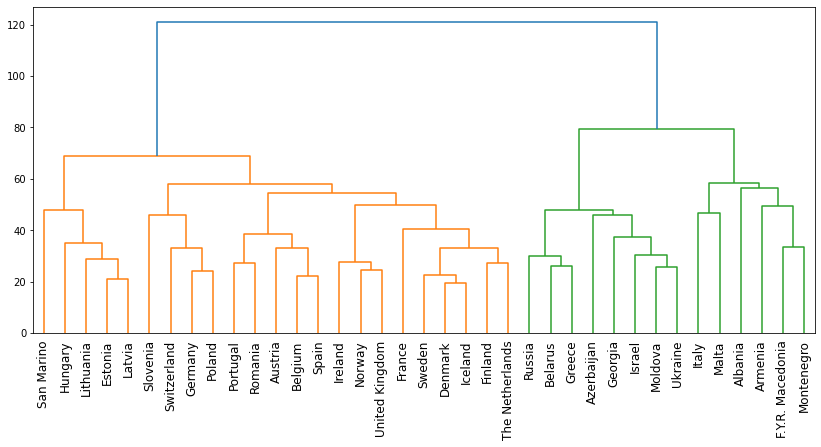

In [7]:
plt.figure(figsize=(14,6))
dendrogram(mergings,
          labels=np.array(labels),
          leaf_rotation=90,
          leaf_font_size=12)
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
model = AgglomerativeClustering(n_clusters=2,
                               affinity='euclidean',
                               linkage='ward')

In [10]:
model.fit(data)

AgglomerativeClustering()

In [11]:
cluster_labels = model.labels_

In [12]:
cluster_labels

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])